# Hello, this is project 2

In [426]:
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import sqlite3
from zipfile import ZipFile # for unzipping the db.zip file
pd.set_option('display.max_columns', None) # show all columns when printing out dataframe

# BOM GROSS has title, year, dom_gross, foreign_gross, SO good earnings metrics

In [232]:
bom_gross_df = pd.read_csv('zippedData/bom.movie_gross.csv.gz')
bom_gross_df.head()
#bom_gross_df.info()

,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
3,Inception,WB,292600000.0,535700000,2010
4,Shrek Forever After,P/DW,238700000.0,513900000,2010


In [233]:
bom_gross_df.shape

(3387, 5)

foreign_gross is listed as an object

### Need to convert foreign gross, and handle null entries... thinking of just dropping missing gross values

In [234]:
bom_gross_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3387 entries, 0 to 3386
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           3387 non-null   object 
 1   studio          3382 non-null   object 
 2   domestic_gross  3359 non-null   float64
 3   foreign_gross   2037 non-null   object 
 4   year            3387 non-null   int64  
dtypes: float64(1), int64(1), object(3)
memory usage: 132.4+ KB


In [235]:
bom_gross_df.describe()

,domestic_gross,year
count,3.359000e+03,3387.000000
mean,2.874585e+07,2013.958075
std,6.698250e+07,2.478141
min,1.000000e+02,2010.000000
25%,1.200000e+05,2012.000000
50%,1.400000e+06,2014.000000
75%,2.790000e+07,2016.000000
max,9.367000e+08,2018.000000


In [236]:
bom_gross_df['foreign_gross'].str.isnumeric().sum()

2032

## Filling NaN's in domestic gross and foreign_gross /w zeros for now

In [237]:
bom_gross_df['domestic_gross'].fillna(0, inplace=True)

In [238]:
bom_gross_df['foreign_gross'].fillna(0, inplace=True)

In [239]:
bom_gross_df.sort_values(by='domestic_gross', ascending=False)

,title,studio,domestic_gross,foreign_gross,year
1872,Star Wars: The Force Awakens,BV,936700000.0,"1,131.6",2015
3080,Black Panther,BV,700100000.0,646900000,2018
3079,Avengers: Infinity War,BV,678800000.0,"1,369.5",2018
1873,Jurassic World,Uni.,652300000.0,"1,019.4",2015
727,Marvel's The Avengers,BV,623400000.0,895500000,2012
...,...,...,...,...,...
936,"Lula, Son of Brazil",NYer,0.0,3800000,2012
1079,The Green Wave,RF,0.0,70100,2012
1975,Surprise - Journey To The West,AR,0.0,49600000,2015
966,The Cup (2012),Myr.,0.0,1800000,2012


In [240]:
# There were 1350 null values, now none
bom_gross_df.loc[bom_gross_df['foreign_gross'].isnull()]

,title,studio,domestic_gross,foreign_gross,year


In [241]:
numeric_values = pd.to_numeric(bom_gross_df['foreign_gross'], errors='coerce')
numeric_values.head()

0    652000000.0
1    691300000.0
2    664300000.0
3    535700000.0
4    513900000.0
Name: foreign_gross, dtype: float64

In [242]:
filtered_df = bom_gross_df[numeric_values.notnull()]

In [243]:
filtered_df.head()

,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
3,Inception,WB,292600000.0,535700000,2010
4,Shrek Forever After,P/DW,238700000.0,513900000,2010


In [244]:
filtered_df['foreign_gross']

0       652000000
1       691300000
2       664300000
3       535700000
4       513900000
          ...    
3382            0
3383            0
3384            0
3385            0
3386            0
Name: foreign_gross, Length: 3382, dtype: object

In [245]:
filtered_df['foreign_gross'].isna().sum()

0

# THIS IS THE WAY TO AVOID SETTING TO COPY

In [247]:
filtered_df.loc[:, 'foreign_gross'] = pd.to_numeric(filtered_df['foreign_gross'], errors='coerce')

In [248]:
filtered_df.sort_values(by='foreign_gross', ascending=False)[:5]

,title,studio,domestic_gross,foreign_gross,year
328,Harry Potter and the Deathly Hallows Part 2,WB,381000000.0,960500000,2011
1875,Avengers: Age of Ultron,BV,459000000.0,946400000,2015
727,Marvel's The Avengers,BV,623400000.0,895500000,2012
3081,Jurassic World: Fallen Kingdom,Uni.,417700000.0,891800000,2018
1127,Frozen,BV,400700000.0,875700000,2013


In [454]:
filtered_df[filtered_df['title'].str.contains("Avengers")]

,title,studio,domestic_gross,foreign_gross,year
727,Marvel's The Avengers,BV,623400000.0,895500000,2012
1875,Avengers: Age of Ultron,BV,459000000.0,946400000,2015


# 2010 is earliest year on record

In [455]:
filtered_df['year'].min()

2010

In [249]:
filtered_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3382 entries, 0 to 3386
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           3382 non-null   object 
 1   studio          3377 non-null   object 
 2   domestic_gross  3382 non-null   float64
 3   foreign_gross   3382 non-null   int64  
 4   year            3382 non-null   int64  
dtypes: float64(1), int64(2), object(2)
memory usage: 158.5+ KB


In [250]:
filtered_df.loc[filtered_df['foreign_gross'] > 0].sort_values(by='foreign_gross')

,title,studio,domestic_gross,foreign_gross,year
921,Chasing Mavericks,Fox,6000000.0,600,2012
721,To Die Like a Man,Strand,4000.0,900,2011
316,The Red Baron,Mont.,37200.0,3100,2010
290,Client 9: The Rise and Fall of Eliot Spitzer,Magn.,189000.0,3500,2010
327,Aashayein (Wishes),Relbig.,0.0,3800,2010
...,...,...,...,...,...
1127,Frozen,BV,400700000.0,875700000,2013
3081,Jurassic World: Fallen Kingdom,Uni.,417700000.0,891800000,2018
727,Marvel's The Avengers,BV,623400000.0,895500000,2012
1875,Avengers: Age of Ultron,BV,459000000.0,946400000,2015


# Making a new df object for movies grossing more than $1M domestically

In [327]:
bom_df = filtered_df.loc[(filtered_df['domestic_gross'] > 1000000)].copy()

In [328]:
bom_df.sort_values(by="domestic_gross", ascending=False)[:10]

,title,studio,domestic_gross,foreign_gross,year
3080,Black Panther,BV,700100000.0,646900000,2018
727,Marvel's The Avengers,BV,623400000.0,895500000,2012
2758,Star Wars: The Last Jedi,BV,620200000.0,712400000,2017
3082,Incredibles 2,BV,608600000.0,634200000,2018
2323,Rogue One: A Star Wars Story,BV,532200000.0,523900000,2016
2759,Beauty and the Beast (2017),BV,504000000.0,759500000,2017
2324,Finding Dory,BV,486300000.0,542300000,2016
1875,Avengers: Age of Ultron,BV,459000000.0,946400000,2015
729,The Dark Knight Rises,WB,448100000.0,636800000,2012
1131,The Hunger Games: Catching Fire,LGF,424700000.0,440300000,2013


In [329]:
bom_df.year.max()

2018

In [330]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1763 entries, 0 to 3281
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           1763 non-null   object 
 1   studio          1763 non-null   object 
 2   domestic_gross  1763 non-null   float64
 3   foreign_gross   1763 non-null   int64  
 4   year            1763 non-null   int64  
dtypes: float64(1), int64(2), object(2)
memory usage: 82.6+ KB


In [331]:
bom_df.shape

(1763, 5)

In [332]:
bom_df.describe()

,domestic_gross,foreign_gross,year
count,1.763000e+03,1.763000e+03,1763.000000
mean,5.295570e+07,8.141110e+07,2014.007374
std,7.886207e+07,1.452939e+08,2.545489
min,1.100000e+06,0.000000e+00,2010.000000
25%,4.900000e+06,1.900000e+06,2012.000000
50%,2.510000e+07,2.130000e+07,2014.000000
75%,6.390000e+07,8.525000e+07,2016.000000
max,7.001000e+08,9.605000e+08,2018.000000


In [333]:
bom_df['domestic_gross']

0       415000000.0
1       334200000.0
2       296000000.0
3       292600000.0
4       238700000.0
           ...     
3277      1300000.0
3278      1300000.0
3279      1200000.0
3280      1200000.0
3281      1200000.0
Name: domestic_gross, Length: 1763, dtype: float64

In [323]:
# in_mills = (bom_df.loc[:, 'domestic_gross'] / 1000000)

In [324]:
# bom_df.loc[:, 'domestic_gross'] = in_mills.copy()

In [335]:
bom_df['domestic_gross'] = (bom_df['domestic_gross'] / 1000000)

In [340]:
bom_df['domestic_gross'].sort_values(ascending=False)

3080    700.1
727     623.4
2758    620.2
3082    608.6
2323    532.2
        ...  
991       1.1
588       1.1
589       1.1
1734      1.1
1360      1.1
Name: domestic_gross, Length: 1763, dtype: float64

In [338]:
bom_df['foreign_gross'] = (bom_df['foreign_gross'] / 1000000)

In [341]:
bom_df['foreign_gross'].sort_values(ascending=False)

328     960.5
1875    946.4
727     895.5
3081    891.8
1127    875.7
        ...  
1717      0.0
2524      0.0
2523      0.0
2522      0.0
3281      0.0
Name: foreign_gross, Length: 1763, dtype: float64

# Failed attempts at assignment because .loc was unneccessary

In [342]:
# bom_df.loc[:, 'domestic_gross'] = bom_df['domestic_gross'] /1000000

In [343]:
# bom_df.loc[:, 'domestic_gross'] = (bom_df.loc[:, 'domestic_gross'] / 1000000).copy()

In [344]:
# bom_df.loc[:, 'domestic_gross'] = bom_df.loc[:, 'domestic_gross'] / 1000000

In [346]:
bom_df.sort_values(by='foreign_gross', ascending=False)

,title,studio,domestic_gross,foreign_gross,year
328,Harry Potter and the Deathly Hallows Part 2,WB,381.0,960.5,2011
1875,Avengers: Age of Ultron,BV,459.0,946.4,2015
727,Marvel's The Avengers,BV,623.4,895.5,2012
3081,Jurassic World: Fallen Kingdom,Uni.,417.7,891.8,2018
1127,Frozen,BV,400.7,875.7,2013
...,...,...,...,...,...
2563,Mohenjo Daro,UTV,1.3,0.0,2016
2562,Housefull 3,Eros,1.3,0.0,2016
2561,Embrace of the Serpent,Osci.,1.3,0.0,2016
2560,The Neon Demon,BG,1.3,0.0,2016


In [457]:
bom_df['total_gross'] = (bom_df['domestic_gross'] + bom_df['foreign_gross'])

In [459]:
bom_df.sort_values(by=["studio", "total_gross"], ascending=True)

,title,studio,domestic_gross,foreign_gross,year,total_gross
155,Sea Rex 3D: Journey to a Prehistoric World,3D,6.1,9.900,2010,16
1723,Locke,A24,1.4,0.000,2014,1
1736,The Captive,A24,1.1,0.000,2014,1
1737,Laggies,A24,1.1,0.000,2014,1
3281,Lean on Pete,A24,1.2,0.000,2018,1
...,...,...,...,...,...,...
2406,Sultan,Yash,6.2,81.100,2016,87
2835,Tiger Zinda Hai,Yash,5.6,81.800,2017,87
1204,Dhoom 3,Yash,8.0,80.000,2013,88
2556,Rustom,Zee,1.1,0.571,2016,2


# Incorrect way of trying to manipulate a groubpy object

In [365]:
# bom_df.groupby("studio").sort_values(by="total_gross", ascending=False)

### correct way to do it

In [460]:
bom_df.groupby("studio").agg(total_gross=("total_gross", "sum")).sort_values(by="total_gross", ascending=False)[:10]

,total_gross
studio,
Studio 8,9826
FD,97763724453213417016246185
WB,9608284932122021571541401121061058174562927112...
MNE,92113
HC,870
Anch.,85
W/Dim.,8320978626782639268
LG/S,8301801407846353318173521481371261174332289898...
Spanglish,8


### New Line Cinema

In [366]:
bom_df[bom_df['studio'] == 'WB (NL)']

,title,studio,domestic_gross,foreign_gross,year,total_gross
24,Sex and the City 2,WB (NL),95.300000,193.0,2010,288.300000
33,Valentine's Day,WB (NL),110.500000,106.0,2010,216.500000
55,A Nightmare on Elm Street (2010),WB (NL),63.100000,52.6,2010,115.700000
118,Going the Distance,WB (NL),17.800000,24.2,2010,42.000000
359,Horrible Bosses,WB (NL),117.500000,92.1,2011,209.600000
374,Final Destination 5,WB (NL),42.600000,115.3,2011,157.900000
385,New Year's Eve,WB (NL),54.500000,87.5,2011,142.000000
400,The Rite,WB (NL),33.000000,63.0,2011,96.000000
407,Hall Pass,WB (NL),45.100000,38.1,2011,83.200000
730,The Hobbit: An Unexpected Journey,WB (NL),303.000000,718.1,2012,1021.100000


In [368]:
bom_df.title.duplicated().sum()

0

In [371]:
# 114 unique studios
len(bom_df.studio.unique())

114

In [372]:
bom_df.studio.unique()

array(['BV', 'WB', 'P/DW', 'Sum.', 'Par.', 'Uni.', 'Fox', 'Wein.', 'Sony',
       'FoxS', 'SGem', 'WB (NL)', 'LGF', 'MBox', 'W/Dim.', 'CBS', 'Focus',
       'MGM', 'Over.', 'Mira.', 'SPC', 'ParV', 'Gold.', 'RAtt.', '3D',
       'UTV', 'Rela.', 'Magn.', 'Anch.', 'PDA', 'App.', 'Rog.', 'Eros',
       'Relbig.', 'Viv.', 'IFC', 'NGE', 'FD', 'TriS', 'ORF', 'NM',
       'Osci.', 'OMNI/FSR', 'Zeit.', 'SMod', 'LG/S', 'FIP', 'ArcEnt',
       'MNE', 'LD', 'Cohen', 'Yash', 'EOne', 'SD', 'A24', 'Jan.', 'Imax',
       'PH', 'RTWC', 'HTR', 'ELS', 'CJ', 'Free', 'SV', 'CE', 'Saban',
       'CF&SR', 'Triu', 'WGUSA', 'CL', 'EC', 'FUN', 'STX', 'BG', 'PFR',
       'BST', 'BH Tilt', 'BSC', 'U/P', 'UHE', 'CLF', 'AaF', 'Abr.', 'PNT',
       'Orch.', 'CineGalaxy', 'Drft.', 'Fathom', 'Zee', 'Ampl.', 'Men.',
       'YFG', 'HC', 'GrtIndia', 'Neon', 'ENTMP', 'Good Deed', 'Aviron',
       'Elev.', 'Annapurna', 'Amazon', 'Affirm', 'Scre.', 'Studio 8',
       'Global Road', 'VPD', 'Trafalgar', 'Greenwich', 'Spanglis

# NEW data exploration: rotten tomatoes

In [373]:
rt_movie_df = pd.read_csv('zippedData/rt.movie_info.tsv.gz', delimiter='\t')
rt_movie_df.head()

,id,synopsis,rating,genre,director,writer,theater_date,dvd_date,currency,box_office,runtime,studio
0,1,"This gritty, fast-paced, and innovative police...",R,Action and Adventure|Classics|Drama,William Friedkin,Ernest Tidyman,"Oct 9, 1971","Sep 25, 2001",NaN,NaN,104 minutes,NaN
1,3,"New York City, not-too-distant-future: Eric Pa...",R,Drama|Science Fiction and Fantasy,David Cronenberg,David Cronenberg|Don DeLillo,"Aug 17, 2012","Jan 1, 2013",$,"600,000",108 minutes,Entertainment One
2,5,Illeana Douglas delivers a superb performance ...,R,Drama|Musical and Performing Arts,Allison Anders,Allison Anders,"Sep 13, 1996","Apr 18, 2000",NaN,NaN,116 minutes,NaN
3,6,Michael Douglas runs afoul of a treacherous su...,R,Drama|Mystery and Suspense,Barry Levinson,Paul Attanasio|Michael Crichton,"Dec 9, 1994","Aug 27, 1997",NaN,NaN,128 minutes,NaN
4,7,NaN,NR,Drama|Romance,Rodney Bennett,Giles Cooper,NaN,NaN,NaN,NaN,200 minutes,NaN


In [374]:
rt_movie_df.shape

(1560, 12)

### This df doesn't have movie titles at all, so needs to be joined with another table i think

In [376]:
rt_movie_df.duplicated().sum()

0

# Next Piece of Data: Rotten tomatoes reviews

In [377]:
rt_reviews_df = pd.read_csv('zippedData/rt.reviews.tsv.gz', delimiter='\t', encoding='unicode_escape')
rt_reviews_df.head()

,id,review,rating,fresh,critic,top_critic,publisher,date
0,3,A distinctly gallows take on contemporary fina...,3/5,fresh,PJ Nabarro,0,Patrick Nabarro,"November 10, 2018"
1,3,It's an allegory in search of a meaning that n...,NaN,rotten,Annalee Newitz,0,io9.com,"May 23, 2018"
2,3,... life lived in a bubble in financial dealin...,NaN,fresh,Sean Axmaker,0,Stream on Demand,"January 4, 2018"
3,3,Continuing along a line introduced in last yea...,NaN,fresh,Daniel Kasman,0,MUBI,"November 16, 2017"
4,3,... a perverse twist on neorealism...,NaN,fresh,NaN,0,Cinema Scope,"October 12, 2017"


In [393]:
rt_reviews_df['review'][0]

"A distinctly gallows take on contemporary financial mores, as one absurdly rich man's limo ride across town for a haircut functions as a state-of-the-nation discourse. "

In [378]:
rt_reviews_df.shape

(54432, 8)

In [379]:
rt_reviews_df.top_critic.value_counts()

0    41336
1    13096
Name: top_critic, dtype: int64

In [394]:
rt_movie_df['id'][0]

1

In [395]:
rt_reviews_df['id'][0]

3

# Separate the reviews by top_critics

In [380]:
top_critics = rt_reviews_df.loc[rt_reviews_df['top_critic'] == 1].copy()

In [381]:
top_critics.head()

,id,review,rating,fresh,critic,top_critic,publisher,date
24,3,"The rapid dialogue is dry and mannered, like a...",2.5/4,rotten,Joe Williams,1,St. Louis Post-Dispatch,"September 6, 2012"
47,3,It feels like each and every moment bursts for...,2/4,rotten,Stephanie Merry,1,Washington Post,"August 24, 2012"
50,3,"There's not really a movie there, nothing that...",2/4,rotten,Mick LaSalle,1,San Francisco Chronicle,"August 23, 2012"
54,3,The film is all too faithful to its un-cinemat...,1.5/4,rotten,Colin Covert,1,Minneapolis Star Tribune,"August 23, 2012"
55,3,"Cosmopolis,"" because of its allegiance to the ...",2/4,rotten,Moira MacDonald,1,Seattle Times,"August 23, 2012"


In [382]:
top_critics.shape

(13096, 8)

# Top 48 critics all have more than 40 reviews logged

In [450]:
review_counts = top_critics.groupby('id').agg('sum')
review_counts.agg(['max', 'min', 'mean'])
review_counts.sort_values(by='top_critic', ascending=False)[40:49]

,top_critic
id,
1695,40
301,40
1525,40
1523,40
290,40
1496,40
1017,40
1009,40
65,39


In [449]:
review_counts.sort_values(by='top_critic', ascending=False)[:10]  # 54 is max value

,top_critic
id,
1777,54
1704,50
1646,49
1083,48
1071,47
1877,47
1545,47
251,47
1588,46


In [415]:
rt_reviews_df.head()

,id,review,rating,fresh,critic,top_critic,publisher,date
0,3,A distinctly gallows take on contemporary fina...,3/5,fresh,PJ Nabarro,0,Patrick Nabarro,"November 10, 2018"
1,3,It's an allegory in search of a meaning that n...,NaN,rotten,Annalee Newitz,0,io9.com,"May 23, 2018"
2,3,... life lived in a bubble in financial dealin...,NaN,fresh,Sean Axmaker,0,Stream on Demand,"January 4, 2018"
3,3,Continuing along a line introduced in last yea...,NaN,fresh,Daniel Kasman,0,MUBI,"November 16, 2017"
4,3,... a perverse twist on neorealism...,NaN,fresh,NaN,0,Cinema Scope,"October 12, 2017"


In [414]:
rt_movie_df.head()

,id,synopsis,rating,genre,director,writer,theater_date,dvd_date,currency,box_office,runtime,studio
0,1,"This gritty, fast-paced, and innovative police...",R,Action and Adventure|Classics|Drama,William Friedkin,Ernest Tidyman,"Oct 9, 1971","Sep 25, 2001",NaN,NaN,104 minutes,NaN
1,3,"New York City, not-too-distant-future: Eric Pa...",R,Drama|Science Fiction and Fantasy,David Cronenberg,David Cronenberg|Don DeLillo,"Aug 17, 2012","Jan 1, 2013",$,"600,000",108 minutes,Entertainment One
2,5,Illeana Douglas delivers a superb performance ...,R,Drama|Musical and Performing Arts,Allison Anders,Allison Anders,"Sep 13, 1996","Apr 18, 2000",NaN,NaN,116 minutes,NaN
3,6,Michael Douglas runs afoul of a treacherous su...,R,Drama|Mystery and Suspense,Barry Levinson,Paul Attanasio|Michael Crichton,"Dec 9, 1994","Aug 27, 1997",NaN,NaN,128 minutes,NaN
4,7,NaN,NR,Drama|Romance,Rodney Bennett,Giles Cooper,NaN,NaN,NaN,NaN,200 minutes,NaN


# id column is unique identifyer for the rotten tomatoes dfs
# rt_movie_df has a genre feature, could be useful- 300 unique values

In [420]:
review = top_critics[top_critics['id'] == 3]
title = rt_movie_df[rt_movie_df['id'] == 3]
# review

In [421]:
# title  # from rt_movie_df

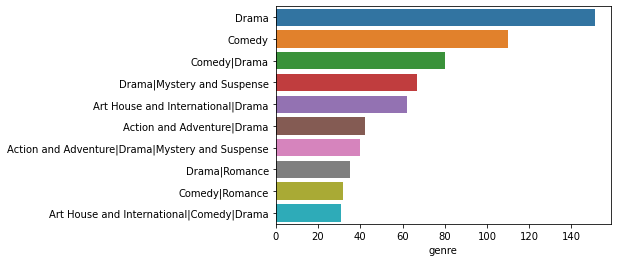

In [437]:
sns.barplot(y=rt_movie_df['genre'].value_counts()[:10].index, x=rt_movie_df['genre'].value_counts()[:10]);

# 4th CSV: the movie db ('tmdb')

In [383]:
tmdb_df = pd.read_csv('zippedData/tmdb.movies.csv.gz')
tmdb_df.head()

,Unnamed: 0,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count
0,0,"[12, 14, 10751]",12444,en,Harry Potter and the Deathly Hallows: Part 1,33.533,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.7,10788
1,1,"[14, 12, 16, 10751]",10191,en,How to Train Your Dragon,28.734,2010-03-26,How to Train Your Dragon,7.7,7610
2,2,"[12, 28, 878]",10138,en,Iron Man 2,28.515,2010-05-07,Iron Man 2,6.8,12368
3,3,"[16, 35, 10751]",862,en,Toy Story,28.005,1995-11-22,Toy Story,7.9,10174
4,4,"[28, 878, 12]",27205,en,Inception,27.920,2010-07-16,Inception,8.3,22186


In [384]:
tmdb_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26517 entries, 0 to 26516
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         26517 non-null  int64  
 1   genre_ids          26517 non-null  object 
 2   id                 26517 non-null  int64  
 3   original_language  26517 non-null  object 
 4   original_title     26517 non-null  object 
 5   popularity         26517 non-null  float64
 6   release_date       26517 non-null  object 
 7   title              26517 non-null  object 
 8   vote_average       26517 non-null  float64
 9   vote_count         26517 non-null  int64  
dtypes: float64(2), int64(3), object(5)
memory usage: 2.0+ MB


In [386]:
tmdb_df['popularity'].agg(['max', 'min', 'mean'])

max     80.773000
min      0.600000
mean     3.130912
Name: popularity, dtype: float64

In [387]:
tmdb_df['vote_average'].agg(['max', 'min', 'mean'])

max     10.000000
min      0.000000
mean     5.991281
Name: vote_average, dtype: float64

# Possibly Drop These

In [388]:
tmdb_df[tmdb_df['vote_average'] == 0]

,Unnamed: 0,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count
2467,2467,[],331998,en,Edie: Girl on Fire,0.600,2010-01-01,Edie: Girl on Fire,0.0,1
4078,4078,"[28, 27, 878, 37]",57817,en,Red River,0.875,2011-05-05,Red River,0.0,1
4282,4282,[35],41840,en,Tom Wilson: Bigger Than You,0.666,2011-12-09,Tom Wilson: Bigger Than You,0.0,1
5176,5176,"[18, 9648, 53]",102678,en,Dead Write,0.600,2011-01-01,Dead Write,0.0,1
5177,5177,[18],81267,hi,क्षय,0.600,2011-10-08,Corrode,0.0,1
...,...,...,...,...,...,...,...,...,...,...
26512,26512,"[27, 18]",488143,en,Laboratory Conditions,0.600,2018-10-13,Laboratory Conditions,0.0,1
26513,26513,"[18, 53]",485975,en,_EXHIBIT_84xxx_,0.600,2018-05-01,_EXHIBIT_84xxx_,0.0,1
26514,26514,"[14, 28, 12]",381231,en,The Last One,0.600,2018-10-01,The Last One,0.0,1
26515,26515,"[10751, 12, 28]",366854,en,Trailer Made,0.600,2018-06-22,Trailer Made,0.0,1


In [391]:
tmdb_df[tmdb_df['vote_average'] == 0]

,Unnamed: 0,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count
2467,2467,[],331998,en,Edie: Girl on Fire,0.600,2010-01-01,Edie: Girl on Fire,0.0,1
4078,4078,"[28, 27, 878, 37]",57817,en,Red River,0.875,2011-05-05,Red River,0.0,1
4282,4282,[35],41840,en,Tom Wilson: Bigger Than You,0.666,2011-12-09,Tom Wilson: Bigger Than You,0.0,1
5176,5176,"[18, 9648, 53]",102678,en,Dead Write,0.600,2011-01-01,Dead Write,0.0,1
5177,5177,[18],81267,hi,क्षय,0.600,2011-10-08,Corrode,0.0,1
...,...,...,...,...,...,...,...,...,...,...
26512,26512,"[27, 18]",488143,en,Laboratory Conditions,0.600,2018-10-13,Laboratory Conditions,0.0,1
26513,26513,"[18, 53]",485975,en,_EXHIBIT_84xxx_,0.600,2018-05-01,_EXHIBIT_84xxx_,0.0,1
26514,26514,"[14, 28, 12]",381231,en,The Last One,0.600,2018-10-01,The Last One,0.0,1
26515,26515,"[10751, 12, 28]",366854,en,Trailer Made,0.600,2018-06-22,Trailer Made,0.0,1


# 5th CSV: "the numbers" movie budgets and gross values

In [389]:
tn_budgets_df = pd.read_csv('zippedData/tn.movie_budgets.csv.gz')
tn_budgets_df.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"


In [438]:
tn_budgets_df.shape

(5782, 6)

In [439]:
tn_budgets_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5782 entries, 0 to 5781
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   id                 5782 non-null   int64 
 1   release_date       5782 non-null   object
 2   movie              5782 non-null   object
 3   production_budget  5782 non-null   object
 4   domestic_gross     5782 non-null   object
 5   worldwide_gross    5782 non-null   object
dtypes: int64(1), object(5)
memory usage: 271.2+ KB


# Looks like near agreement on the total gross values between the two databases

In [443]:
tn_budgets_df[tn_budgets_df['movie'] == "Avengers: Age of Ultron"]

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"


In [445]:
bom_df[bom_df['title'] == "Avengers: Age of Ultron"]

,title,studio,domestic_gross,foreign_gross,year,total_gross
1875,Avengers: Age of Ultron,BV,459.0,946.4,2015,1405.4


In [452]:
tn_budgets_df[tn_budgets_df['movie'] == "Avengers: Infinity War"]

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
6,7,"Apr 27, 2018",Avengers: Infinity War,"$300,000,000","$678,815,482","$2,048,134,200"


In [453]:
bom_df[bom_df['title'] == "Avengers: Infinity War"]

,title,studio,domestic_gross,foreign_gross,year,total_gross


# Looks like near agreement on the total gross values between the two databases

In [415]:
rt_reviews_df.head()

,id,review,rating,fresh,critic,top_critic,publisher,date
0,3,A distinctly gallows take on contemporary fina...,3/5,fresh,PJ Nabarro,0,Patrick Nabarro,"November 10, 2018"
1,3,It's an allegory in search of a meaning that n...,NaN,rotten,Annalee Newitz,0,io9.com,"May 23, 2018"
2,3,... life lived in a bubble in financial dealin...,NaN,fresh,Sean Axmaker,0,Stream on Demand,"January 4, 2018"
3,3,Continuing along a line introduced in last yea...,NaN,fresh,Daniel Kasman,0,MUBI,"November 16, 2017"
4,3,... a perverse twist on neorealism...,NaN,fresh,NaN,0,Cinema Scope,"October 12, 2017"


In [414]:
rt_movie_df.head()

,id,synopsis,rating,genre,director,writer,theater_date,dvd_date,currency,box_office,runtime,studio
0,1,"This gritty, fast-paced, and innovative police...",R,Action and Adventure|Classics|Drama,William Friedkin,Ernest Tidyman,"Oct 9, 1971","Sep 25, 2001",NaN,NaN,104 minutes,NaN
1,3,"New York City, not-too-distant-future: Eric Pa...",R,Drama|Science Fiction and Fantasy,David Cronenberg,David Cronenberg|Don DeLillo,"Aug 17, 2012","Jan 1, 2013",$,"600,000",108 minutes,Entertainment One
2,5,Illeana Douglas delivers a superb performance ...,R,Drama|Musical and Performing Arts,Allison Anders,Allison Anders,"Sep 13, 1996","Apr 18, 2000",NaN,NaN,116 minutes,NaN
3,6,Michael Douglas runs afoul of a treacherous su...,R,Drama|Mystery and Suspense,Barry Levinson,Paul Attanasio|Michael Crichton,"Dec 9, 1994","Aug 27, 1997",NaN,NaN,128 minutes,NaN
4,7,NaN,NR,Drama|Romance,Rodney Bennett,Giles Cooper,NaN,NaN,NaN,NaN,200 minutes,NaN


In [442]:
bom_df[bom_df['title'].str.contains("Avatar")]

,title,studio,domestic_gross,foreign_gross,year,total_gross
128,Avatar: Special Edition,Fox,10.7,22.5,2010,33.2


In [ ]:
review = top_critics[top_critics['id'] == 3]
title = rt_movie_df[rt_movie_df['id'] == 3]
# review

In [447]:
tn_budgets_df[tn_budgets_df['id'] == 3]
tn_budgets_df['id'].value_counts()

4      58
53     58
61     58
65     58
69     58
       ..
85     57
100    57
96     57
92     57
97     57
Name: id, Length: 100, dtype: int64

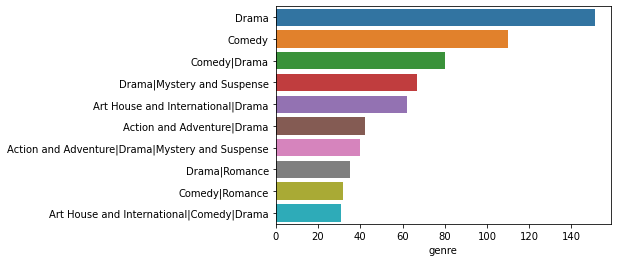

In [437]:
sns.barplot(y=rt_movie_df['genre'].value_counts()[:10].index, x=rt_movie_df['genre'].value_counts()[:10]);